# Project -CS35

## Importing Data

In [1]:
import matplotlib.pyplot as pp

import seaborn
from pylab import *
import numpy as np
from sklearn import datasets
from sklearn import cross_validation
import pandas as pd
from sklearn import tree      # for decision trees
from sklearn import ensemble

try: # different imports for different versions of scikit-learn
    from sklearn.model_selection import cross_val_score   # simpler cv this week
except ImportError:
    try:
        from sklearn.cross_validation import cross_val_score
    except:
        print("No cross_val_score!")
        

/Users/Indu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Cleaning

In [2]:
df = pd.read_csv('data_final.csv', header=0)
df.head()
df.info()

# let's drop columns with too few values or that won't be meaningful
# Here's an example of dropping the 'body' column:

df = df.drop('year', axis=1)
df = df.drop('cie', axis=1)
df = df.drop('gBookEquity', axis=1)






df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 88 columns):
id                          2556 non-null int64
year                        2556 non-null int64
cie                         2556 non-null object
sector                      2556 non-null object
casheq                      2556 non-null float64
receiv                      2556 non-null float64
inv                         2556 non-null int64
othcurrentA                 2556 non-null int64
totcurrentA                 2556 non-null float64
PPE                         2556 non-null float64
totinv                      2556 non-null float64
intA                        2556 non-null float64
othA                        2556 non-null float64
TA                          2556 non-null float64
stD                         2556 non-null int64
accountPay                  2556 non-null int64
incometaxpay                2556 non-null int64
othcurrentL                 2556 non-null int64
totcurrentL

In [3]:
df = df.dropna()

In [4]:
def transform(s):
    """ from string to number
    """
    d = { 'Energy':0, 'Utilities':1,'Industrials':2,'Information Technology':3,'Consumer Discretionary':4,
         'Telecommunication Services':5,'Consumer Staples':6,'Materials':7,'Financials':8,'Health Care':9,
         'Real Estate':10}
    
    return d[s]

df['sector'] = df['sector'].map(transform)

df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 4 to 2531
Data columns (total 85 columns):
id                          1363 non-null int64
sector                      1363 non-null int64
casheq                      1363 non-null float64
receiv                      1363 non-null float64
inv                         1363 non-null int64
othcurrentA                 1363 non-null int64
totcurrentA                 1363 non-null float64
PPE                         1363 non-null float64
totinv                      1363 non-null float64
intA                        1363 non-null float64
othA                        1363 non-null float64
TA                          1363 non-null float64
stD                         1363 non-null int64
accountPay                  1363 non-null int64
incometaxpay                1363 non-null int64
othcurrentL                 1363 non-null int64
totcurrentL                 1363 non-null float64
ltD                         1363 non-null float64
totL     

In [5]:

def transform1(s):
    """ from string to number
    """
    for i in s:
       
        return float(i)    
    
    return d[s]

df['InvTurnover'] = df['InvTurnover'].map(transform1)
df.head()
df.info()






<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 4 to 2531
Data columns (total 85 columns):
id                          1363 non-null int64
sector                      1363 non-null int64
casheq                      1363 non-null float64
receiv                      1363 non-null float64
inv                         1363 non-null int64
othcurrentA                 1363 non-null int64
totcurrentA                 1363 non-null float64
PPE                         1363 non-null float64
totinv                      1363 non-null float64
intA                        1363 non-null float64
othA                        1363 non-null float64
TA                          1363 non-null float64
stD                         1363 non-null int64
accountPay                  1363 non-null int64
incometaxpay                1363 non-null int64
othcurrentL                 1363 non-null int64
totcurrentL                 1363 non-null float64
ltD                         1363 non-null float64
totL     

In [6]:
df['ReceivTurnover'] = df['ReceivTurnover'].map(transform1)

In [7]:
df['CurrentRatio'] = df['CurrentRatio'].map(transform1)

In [8]:
df['CashRatio'] = df['CashRatio'].map(transform1)

In [9]:
df['WCTurnover']= [float(x) for x in df['WCTurnover'] ]

In [10]:
df['InterestCoverage']= [float(x) for x in df['InterestCoverage'] ]

In [11]:
df['NetDebtTOEBITDA']= [float(x) for x in df['NetDebtTOEBITDA'] ]

In [12]:
df['PE']= [float(x) for x in df['PE']]

In [13]:
df['EVtoEBITDA']= [float(x) for x in df['EVtoEBITDA']]
df['PricetoCF']= [float(x) for x in df['PricetoCF']]



In [14]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 4 to 2531
Data columns (total 85 columns):
id                          1363 non-null int64
sector                      1363 non-null int64
casheq                      1363 non-null float64
receiv                      1363 non-null float64
inv                         1363 non-null int64
othcurrentA                 1363 non-null int64
totcurrentA                 1363 non-null float64
PPE                         1363 non-null float64
totinv                      1363 non-null float64
intA                        1363 non-null float64
othA                        1363 non-null float64
TA                          1363 non-null float64
stD                         1363 non-null int64
accountPay                  1363 non-null int64
incometaxpay                1363 non-null int64
othcurrentL                 1363 non-null int64
totcurrentL                 1363 non-null float64
ltD                         1363 non-null float64
totL     

### Creating Training and Test Data

In [15]:
X_all = df.iloc[:,41:82].values        # iloc == "integer locations" of rows/cols
y_all = df[ 'beat' ].values    

In [93]:

X_labeled = X_all[25:,:]  # make the 10 into 0 to keep all of the data
y_labeled = y_all[25:]    # same for this line
X_test =  X_all[0:25,:]
y_test = y_all[0:25]
#
# we can scramble the data - but only the labeled data!
# 
indices = np.random.permutation(len(X_labeled))  # this scrambles the data each time
X_data_full = X_labeled[indices]
y_data_full = y_labeled[indices]

X_train = X_data_full
y_train = y_data_full

# KNN Neighbors

In [95]:
from sklearn.neighbors import KNeighborsClassifier

test_score=0
train_score=0
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors=7)  

    #
    # cross-validate (use part of the training data for training - and part for testing)
    #   first, create cross-validation data (here 3/4 train and 1/4 test)
    cv_data_train, cv_data_test, cv_target_train, cv_target_test = \
        cross_validation.train_test_split(X_train, y_train, test_size=0.1) # random_state=0 

    # fit the model using the cross-validation data
    #   typically cross-validation is used to get a sense of how well it works
    #   and tune any parameters, such as the k in kNN (3? 5? 7? 41?, etc.)
    knn.fit(cv_data_train, cv_target_train) 
    train_score+=knn.score(cv_data_train,cv_target_train)
    test_score+=knn.score(cv_data_test,cv_target_test)
#print("KNN cv training-data score for K :", train_score/10)
print("KNN cv testing-data score for K:",test_score/10) 

KNN cv testing-data score for K: 0.6253731343283582


In [96]:
from sklearn.neighbors import KNeighborsClassifier
L = [1,3,5,7,9,11,15,17,19,21,23,25,27,31]


for k in L:
    test_score=0
    train_score=0
    for i in range(10):
        knn = KNeighborsClassifier(n_neighbors=k)  
        cv_data_train, cv_data_test, cv_target_train, cv_target_test = \
            cross_validation.train_test_split(X_train, y_train, test_size=0.1) # random_state=0 

        
        knn.fit(cv_data_train, cv_target_train) 
        train_score+=knn.score(cv_data_train,cv_target_train)
        test_score+=knn.score(cv_data_test,cv_target_test)
    #print("KNN cv training-data score for K :", train_score/10)
    print(k,"KNN cv testing-data score for K:",test_score/10) 

1 KNN cv testing-data score for K: 0.6201492537313433
3 KNN cv testing-data score for K: 0.6291044776119402
5 KNN cv testing-data score for K: 0.6201492537313433
7 KNN cv testing-data score for K: 0.6402985074626866
9 KNN cv testing-data score for K: 0.6298507462686567
11 KNN cv testing-data score for K: 0.6708955223880597
15 KNN cv testing-data score for K: 0.6111940298507463
17 KNN cv testing-data score for K: 0.6082089552238805
19 KNN cv testing-data score for K: 0.6485074626865671
21 KNN cv testing-data score for K: 0.6485074626865672
23 KNN cv testing-data score for K: 0.6529850746268656
25 KNN cv testing-data score for K: 0.658955223880597
27 KNN cv testing-data score for K: 0.6559701492537313
31 KNN cv testing-data score for K: 0.6395522388059701


In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19)  

cv_data_train, cv_data_test, cv_target_train, cv_target_test = \
    cross_validation.train_test_split(X_train, y_train, test_size=0.10) # random_state=0 

knn.fit(cv_data_train, cv_target_train) 
print("KNN cv training-data score for K :", knn.score(cv_data_train,cv_target_train))
print("KNN cv testing-data score for K :", knn.score(cv_data_test,cv_target_test))

KNN cv training-data score for K : 0.6794019933554817
KNN cv testing-data score for K : 0.6343283582089553


In [98]:
knn.fit(X_train, y_train) 
print("\nCreated and trained a knn classifier")  #, knn


print("iris_X_test's predicted outputs are")
print(knn.predict(X_test))


print("and the actual labels are")
print(y_test)


Created and trained a knn classifier
iris_X_test's predicted outputs are
[1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1]
and the actual labels are
[1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1]


### Grid Search for Hyperparameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.6194029850746269, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.6231343283582089, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.6865671641791045, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.5783582089552238, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.627819548872

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s


[CV]  n_neighbors=11, weights=distance, score=0.6380597014925373, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV]  n_neighbors=11, weights=uniform, score=0.6417910447761194, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV]  n_neighbors=11, weights=uniform, score=0.6119402985074627, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV]  n_neighbors=11, weights=distance, score=0.6156716417910447, total=   0.1s
[CV] n_neighbors=13, weights=uniform .................................
[CV]  n_neighbors=11, weights=distance, score=0.664179104477612, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV]  n_neighbors=11, weights=distance, score=0.6156716417910447, total=   0.0s
[CV] n_neighbors=11, weights=distance ................................
[CV]  n_neighbors=13, weights=uniform, score=0.6044776119402985, total=   0.1s
[CV] n_neighbors=1

[CV] n_neighbors=21, weights=distance ................................
[CV]  n_neighbors=23, weights=uniform, score=0.667910447761194, total=   0.1s
[CV] n_neighbors=23, weights=uniform .................................
[CV]  n_neighbors=21, weights=distance, score=0.664179104477612, total=   0.0s
[CV] n_neighbors=23, weights=uniform .................................
[CV]  n_neighbors=23, weights=uniform, score=0.6604477611940298, total=   0.0s
[CV] n_neighbors=23, weights=uniform .................................
[CV]  n_neighbors=21, weights=distance, score=0.6278195488721805, total=   0.1s
[CV] n_neighbors=23, weights=distance ................................
[CV]  n_neighbors=23, weights=uniform, score=0.6753731343283582, total=   0.1s
[CV] n_neighbors=23, weights=distance ................................
[CV]  n_neighbors=23, weights=uniform, score=0.6278195488721805, total=   0.0s
[CV] n_neighbors=23, weights=distance ................................
[CV]  n_neighbors=23, weights

[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [108]:
grid_search.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [109]:
grid_search.best_score_

0.647982062780269

In [110]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.72

# Decision Tree

In [59]:
a=list(df)
feature_names = a[41:82]
target_names = ['0', '1']

In [60]:
for max_depth in [3,4,5,6]:
    # the DT classifier
    dtree = tree.DecisionTreeClassifier(max_depth=max_depth)

    # train it (build the tree)
    dtree = dtree.fit(X_train, y_train) 

    # write out the dtree to tree.dot (or another filename of your choosing...)
    filename = 'treeown' + str(max_depth) + '.dot'
    tree.export_graphviz(dtree, out_file=filename,   # the filename constructed above...!
                            feature_names=feature_names,  filled=True, 
                            rotate=False, # LR vs UD
                            class_names=target_names, 
                             rounded=True,  
                         special_characters=True )  # lots of options!
    #
    # Visualize the resulting graphs (the trees) at www.webgraphviz.com
    #
    print("Wrote the file", filename)  
    

Wrote the file treeown3.dot
Wrote the file treeown4.dot
Wrote the file treeown5.dot
Wrote the file treeown6.dot


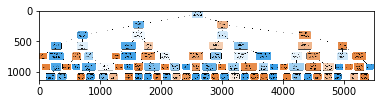

In [61]:
import matplotlib.image as mp
import matplotlib.pyplot as plt
! dot -Tpng 'treeown3.dot' -o 'treeown3.png'
! dot -Tpng 'treeown4.dot' -o 'treeown4.png'
! dot -Tpng 'treeown5.dot' -o 'treeown5.png'
! dot -Tpng 'treeown6.dot' -o 'treeown6.png'

img= mp.imread('treeown6.png')
plt.imshow(img)
plt.show()

In [62]:
for max_depth in range(1,10):
    # create our classifier
    dtree = tree.DecisionTreeClassifier(max_depth=max_depth)
    #
    # cross-validate to tune our model (this week, all-at-once)
    #
    scores = cross_val_score(dtree, X_train, y_train, cv=5)
    average_cv_score = scores.mean()
    print("For depth=", max_depth, "average CV score = ", average_cv_score)  
    # print("      Scores:", scores)

# import sys
# print("bye!")
# sys.exit(0)

For depth= 1 average CV score =  0.7548872180451128
For depth= 2 average CV score =  0.7712770732802154
For depth= 3 average CV score =  0.7795140837167546
For depth= 4 average CV score =  0.7645045449444507
For depth= 5 average CV score =  0.7757266300078555
For depth= 6 average CV score =  0.7667545729996632
For depth= 7 average CV score =  0.768269554483223
For depth= 8 average CV score =  0.7630288407586129
For depth= 9 average CV score =  0.7480754124116261


In [63]:
MAX_DEPTH = 4   # choose a MAX_DEPTH based on cross-validation... 
print("\nChoosing MAX_DEPTH =", MAX_DEPTH, "\n")


Choosing MAX_DEPTH = 4 



In [64]:

# our decision-tree classifier...
dtree = tree.DecisionTreeClassifier(max_depth=MAX_DEPTH)
dtree = dtree.fit(X_train, y_train) 

#
# and... Predict the unknown data labels
#
print("Decision-tree predictions:\n")
predicted_labels = dtree.predict(X_test)
answer_labels = y_test

Decision-tree predictions:



In [66]:
s = "{0:<11} | {1:<11}".format("Predicted","Answer")
#  arg0: left-aligned, 11 spaces, string, arg1: ditto
print(s)
s = "{0:<11} | {1:<11}".format("-------","-------")
print(s)
# the table...
for p, a in zip( predicted_labels, answer_labels ):
    s = "{0:<11} | {1:<11}".format(p,a)
    print(s)

#
# feature importances!
#
print()
print("dtree.feature_importances_ are\n      ", dtree.feature_importances_) 
print("Order:", feature_names[0:64])



Predicted   | Answer     
-------     | -------    
1           | 1          
1           | 0          
0           | 0          
1           | 1          
1           | 1          
0           | 0          
0           | 0          
0           | 0          
1           | 0          
1           | 1          
1           | 1          
1           | 1          
0           | 0          
0           | 0          
0           | 0          
1           | 1          
1           | 0          
1           | 1          
0           | 0          
1           | 1          
0           | 0          
1           | 1          
1           | 1          
1           | 0          
1           | 1          

dtree.feature_importances_ are
       [0.         0.         0.         0.         0.         0.
 0.02051813 0.         0.         0.         0.         0.
 0.         0.         0.01410022 0.         0.         0.06829651
 0.         0.         0.         0.         0.02753859 0.03290793
 0.    

# Random Forest

In [67]:
X_labeled = X_all[25:,:]  # make the 10 into 0 to keep all of the data
y_labeled = y_all[25:]    # same for this line

#
# we can scramble the data - but only the labeled data!
# 
indices = np.random.permutation(len(X_labeled))  # this scrambles the data each time
X_data_full = X_labeled[indices]
y_data_full = y_labeled[indices]

X_train = X_data_full
y_train = y_data_full

In [68]:
L=[]

for max_depth in range(2,5):
    for n_estimators in range(100,250,10):
        rforest = ensemble.RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)

        # an example call to run 5x cross-validation on the labeled data
        scores = cross_val_score(rforest, X_train, y_train, cv=5)
        #print(max_depth,n_estimators,"CV scores:", scores)
        print(max_depth,n_estimators,"CV scores' average:", scores.mean())
        L+=[[scores.mean(),max_depth,n_estimators]]



2 100 CV scores' average: 0.7899225676130625
2 110 CV scores' average: 0.7929413084951185
2 120 CV scores' average: 0.7959207720794523
2 130 CV scores' average: 0.7906856693973741
2 140 CV scores' average: 0.7914319380540905
2 150 CV scores' average: 0.7899281786555943
2 160 CV scores' average: 0.7929413084951185
2 170 CV scores' average: 0.7921782067108069
2 180 CV scores' average: 0.7929356974525867
2 190 CV scores' average: 0.7951801144652677
2 200 CV scores' average: 0.7974189204354168
2 210 CV scores' average: 0.7914263270115589
2 220 CV scores' average: 0.7966670407361688
2 230 CV scores' average: 0.7951688923802042
2 240 CV scores' average: 0.7951913365503311
3 100 CV scores' average: 0.8026315789473685
3 110 CV scores' average: 0.8063909774436091
3 120 CV scores' average: 0.8048872180451128
3 130 CV scores' average: 0.8041241162608012
3 140 CV scores' average: 0.8048872180451128
3 150 CV scores' average: 0.8056390977443609
3 160 CV scores' average: 0.8026484120749634
3 170 CV s

In [69]:
max(L)

[0.8130905622264617, 4, 150]

In [71]:
X_test = X_all[0:25,:]              # the final testing data
X_train = X_all[25:,:]              # the training data

y_test = y_all[0:25]                  # the final testing outputs/labels (unknown)
y_train = y_all[25:]                  # the training outputs/labels (known)

# these next lines is where the full training data is used for the model
MAX_DEPTH = 4
NUM_TREES = 150
print()
print("Using MAX_DEPTH=", MAX_DEPTH, "and NUM_TREES=", NUM_TREES)
rforest = ensemble.RandomForestClassifier(max_depth=MAX_DEPTH, n_estimators=NUM_TREES)
rforest = rforest.fit(X_train, y_train) 

# here are some examples, printed out:
print("Random-forest predictions:\n")
predicted_labels = rforest.predict(X_test)
answer_labels = y_test # note that we're "cheating" here!




Using MAX_DEPTH= 4 and NUM_TREES= 150
Random-forest predictions:



In [72]:
s = "{0:<11} | {1:<11}".format("Predicted","Answer")
#  arg0: left-aligned, 11 spaces, string, arg1: ditto
print(s)
s = "{0:<11} | {1:<11}".format("-------","-------")
print(s)
# the table...
for p, a in zip( predicted_labels, answer_labels ):
    s = "{0:<11} | {1:<11}".format(p,a)
    print(s)

#
# feature importances
#
print("\nrforest.feature_importances_ are\n      ", rforest.feature_importances_) 
print("Order:", feature_names[0:64])





Predicted   | Answer     
-------     | -------    
1           | 1          
1           | 0          
0           | 0          
1           | 1          
1           | 1          
0           | 0          
0           | 0          
0           | 0          
1           | 0          
1           | 1          
0           | 1          
1           | 1          
0           | 0          
0           | 0          
0           | 0          
1           | 1          
0           | 0          
1           | 1          
0           | 0          
1           | 1          
0           | 0          
1           | 1          
1           | 1          
0           | 0          
1           | 1          

rforest.feature_importances_ are
       [0.00084277 0.00145497 0.00387963 0.00411626 0.00137324 0.0004469
 0.00620882 0.00548887 0.00326709 0.00276202 0.004182   0.00405054
 0.00600823 0.00561783 0.02099994 0.02728981 0.02546301 0.02818797
 0.0052965  0.0023725  0.00957535 0.01110352 0.02532932 0

# Support Vector Machine

In [73]:
from sklearn.svm import SVC


In [77]:
svm_clf = SVC(kernel="linear")
X = X_train
y = y_train
svm_clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


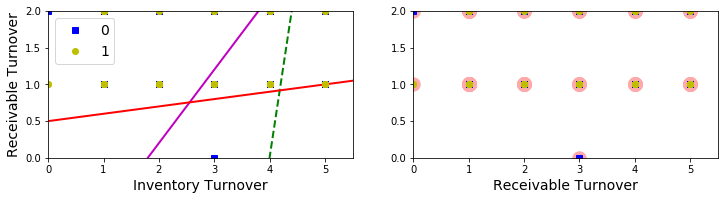

In [86]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="1")
plt.xlabel("Inventory Turnover", fontsize=14)
plt.ylabel("Receivable Turnover", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Receivable Turnover", fontsize=14)
plt.axis([0, 5.5, 0, 2])

savefig("large_margin_classification_plot")
plt.show()

### Sensitivity to feature scales


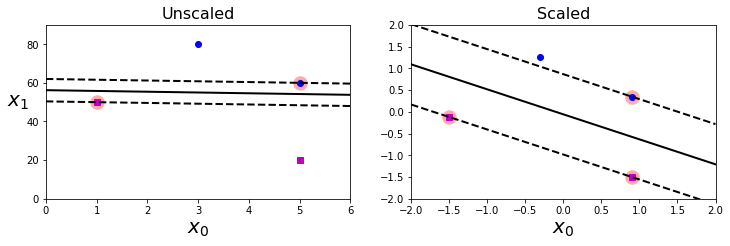

In [88]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear")
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

savefig("sensitivity_to_feature_scales_plot")

### SVM Classifier

In [89]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        n_iter=100000, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

/Users/Indu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


LinearSVC:                    [0.87239683] [[-1.76366310e-02  7.23978228e-02 -4.92614148e-02 -1.06707978e-01
  -1.39142734e-01  1.29020249e-01  1.48947663e-01 -1.76585976e-01
   1.06890470e-01 -4.61662541e-01 -5.35998075e-02  1.27116721e-01
  -2.53614467e-01  2.80083612e-01  1.00859567e-01 -5.21637507e+00
   1.89860334e-01 -1.23255175e+00  5.45703876e-02 -1.29609268e-01
   1.85678086e-01  2.09888498e-01 -4.22005909e-02  2.16250729e-02
   3.02659289e-01 -1.45484242e-03 -9.60884290e-02  3.74855123e-02
  -1.89870479e-02  8.53155029e-02  1.31071722e-03  7.04848163e-02
  -2.26883021e+00  3.61119043e-01 -3.90900314e-01  7.91654071e-01
   6.25788589e-03 -8.41140009e-02 -1.06078073e+01  3.39284965e+00
  -7.33109382e+00]]
SVC:                          [0.87740307] [[-1.19584144e-02  6.54828306e-02 -8.05276553e-02 -1.22315965e-01
  -1.50301454e-01  1.59298238e-01  1.35277112e-01 -1.71784466e-01
   9.93291648e-02 -4.30305688e-01 -5.09796391e-02  9.26757229e-02
  -2.16591830e-01  2.83061711e-01  1

In [97]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.6853512705530643

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [100]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [101]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.6943198804185351

In [103]:
svm_clf = SVC(decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7070254110612855

### Randomization

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=5.016775169781472, gamma=0.007783246163164586 .................
[CV] .. C=5.016775169781472, gamma=0.007783246163164586, total=   0.0s
[CV] C=5.016775169781472, gamma=0.007783246163164586 .................
[CV] .. C=5.016775169781472, gamma=0.007783246163164586, total=   0.0s
[CV] C=5.016775169781472, gamma=0.007783246163164586 .................
[CV] .. C=5.016775169781472, gamma=0.007783246163164586, total=   0.0s
[CV] C=5.155968032306745, gamma=0.005842172189102732 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .. C=5.155968032306745, gamma=0.005842172189102732, total=   0.0s
[CV] C=5.155968032306745, gamma=0.005842172189102732 .................
[CV] .. C=5.155968032306745, gamma=0.005842172189102732, total=   0.0s
[CV] C=5.155968032306745, gamma=0.005842172189102732 .................
[CV] .. C=5.155968032306745, gamma=0.005842172189102732, total=   0.0s
[CV] C=2.0583385339912112, gamma=0.012772441402269482 ................
[CV] . C=2.0583385339912112, gamma=0.012772441402269482, total=   0.0s
[CV] C=2.0583385339912112, gamma=0.012772441402269482 ................
[CV] . C=2.0583385339912112, gamma=0.012772441402269482, total=   0.0s
[CV] C=2.0583385339912112, gamma=0.012772441402269482 ................
[CV] . C=2.0583385339912112, gamma=0.012772441402269482, total=   0.0s
[CV] C=5.200644626990736, gamma=0.012902048772960955 .................
[CV] .. C=5.200644626990736, gamma=0.012902048772960955, total=   0.0s
[CV] C=5.200644626990736, gamma=0.012902048772960955 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a0b569630>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x104961be0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [106]:
rnd_search_cv.best_estimator_

SVC(C=6.50108641321634, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01762376394367759,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [107]:
rnd_search_cv.best_score_


0.681

In [108]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=6.50108641321634, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01762376394367759,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [109]:
_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7070254110612855

In [110]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.72

### SVM Regressor

In [112]:
from sklearn.datasets import fetch_california_housing

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [116]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.3147845465850509

In [117]:
np.sqrt(mse)

0.5610566340264153

In [118]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   0.1s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   0.1s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   0.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   0.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   0.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   0.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   0.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   0.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   0.1s
[CV] C=1.5808361216819946, gamma=0.05399484409787431 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.9s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a0b461940>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x104015940>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [119]:
rnd_search_cv.best_estimator_

SVR(C=1.5808361216819946, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.05399484409787431, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.2839904982829599

In [121]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.46594247621293766

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = log_reg.predict(X_test)

In [19]:
score = log_reg.score(X_test, y_test)
print(score)

0.84


### Cross validation

In [20]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.748


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[10  3]
 [ 1 11]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.77      0.83        13
          1       0.79      0.92      0.85        12

avg / total       0.85      0.84      0.84        25



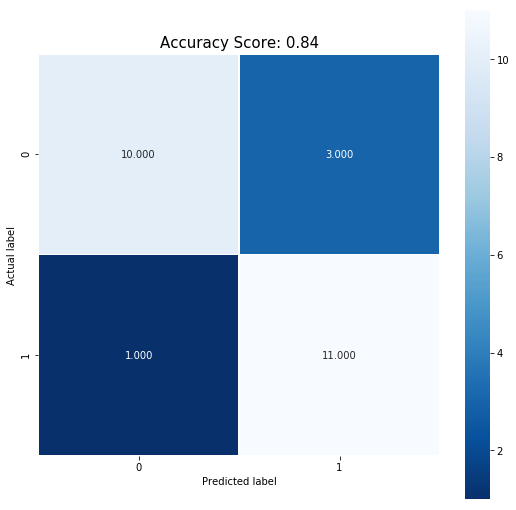

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

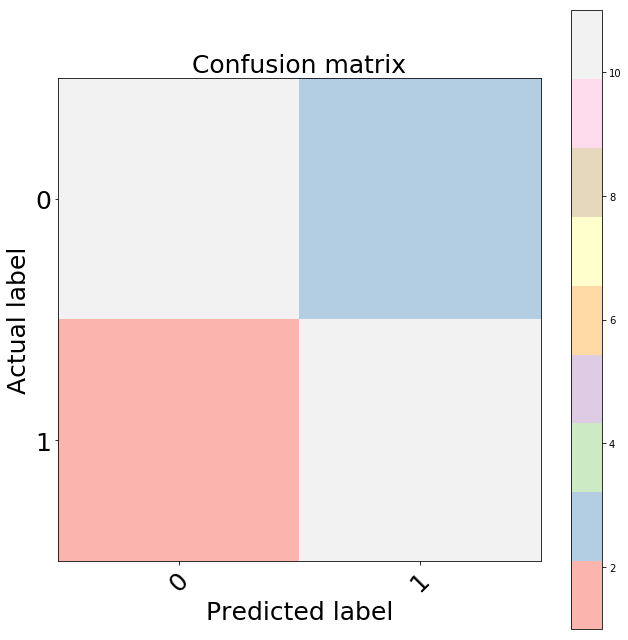

In [25]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 25)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 25)
plt.yticks(tick_marks, ["0", "1"], size = 25)
plt.tight_layout()
plt.ylabel('Actual label', size = 25)
plt.xlabel('Predicted label', size = 25)
width, height = cm.shape

### ROC Curve

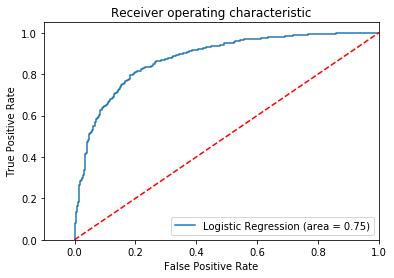

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, log_reg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
a=list(df)
feature_names = a[41:82]
X=pd.DataFrame(X_all)
X.columns=feature_names

In [52]:
import statsmodels.api as sm

logit_model=sm.Logit(y_all,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.414057
         Iterations 12
                             Results: Logit
Model:                 Logit               No. Iterations:      12.0000  
Dependent Variable:    y                   Pseudo R-squared:    0.384    
Date:                  2018-04-15 22:12    AIC:                 1210.7181
No. Observations:      1363                BIC:                 1424.6332
Df Model:              40                  Log-Likelihood:      -564.36  
Df Residuals:          1322                LL-Null:             -916.00  
Converged:             1.0000              Scale:               1.0000   
-------------------------------------------------------------------------
                       Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------
InvTurnover            -0.0024   0.0315  -0.0756 0.9397  -0.0641   0.0593
ReceivTurnover          0.0275   0.0293

# Dimensionality Reduction( PCA)

In [112]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

In [113]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [114]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 0.06s


In [115]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [117]:
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [118]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 0.03s


In [119]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.44

In [120]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [121]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 0.09s


In [122]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6

In [123]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [124]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 0.02s


In [125]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.48

### Dimensionality Reduction( LLE)

In [126]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_train)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
#plot_(X_lle_reduced, y_train)
#plt.show()

LLE took 0.4s.


In [127]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

# Voting Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
knn_clf = KNeighborsClassifier(n_neighbors=21)
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('knn',knn_clf),('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [146]:
from sklearn.metrics import accuracy_score

for clf in (knn_clf,log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.68
LogisticRegression 0.84
RandomForestClassifier 0.88
SVC 0.52
VotingClassifier 0.92


/Users/Indu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [147]:
knn_clf = KNeighborsClassifier(n_neighbors=21)
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('knn',knn_clf),('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [148]:
from sklearn.metrics import accuracy_score

for clf in (knn_clf,log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.68
LogisticRegression 0.84
RandomForestClassifier 0.88
SVC 0.52
VotingClassifier 0.92


/Users/Indu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Artificial Neural Nework(NNets)

In [150]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd



In [151]:
X_labeled = X_all[25:,:]  # make the 10 into 0 to keep all of the data
y_labeled = y_all[25:]    # same for this line
X_test =  X_all[0:25,:]
y_test = y_all[0:25]
#
# we can scramble the data - but only the labeled data!
# 
indices = np.random.permutation(len(X_labeled))  # this scrambles the data each time
X_data_full = X_labeled[indices]
y_data_full = y_labeled[indices]

X_known = X_data_full
y_known = y_data_full
X_unknown = X_test
y_unknown = y_test

In [152]:
KNOWN_SIZE = len(y_known)
indices = np.random.permutation(KNOWN_SIZE)  # this scrambles the data each time
X_known = X_known[indices]
y_known = y_known[indices]

In [153]:
TRAIN_FRACTION = 0.85
TRAIN_SIZE = int(TRAIN_FRACTION*KNOWN_SIZE)
TEST_SIZE = KNOWN_SIZE - TRAIN_SIZE   # not really needed, but...
X_train = X_known[:TRAIN_SIZE]
y_train = y_known[:TRAIN_SIZE]

X_test = X_known[TRAIN_SIZE:]
y_test = y_known[TRAIN_SIZE:]

In [154]:
USE_SCALER = True
if USE_SCALER == True:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)   # Fit only to the training dataframe
    # now, rescale inputs -- both testing and training
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_unknown1 = scaler.transform(X_unknown)
   



In [159]:
mlp = MLPClassifier(hidden_layer_sizes=(10,20,15,20,10), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=True, shuffle=True, early_stopping = False, # tol=1e-4, 
                    random_state=None, # reproduceability
                    learning_rate_init=.1, learning_rate = 'adaptive')
print("\n\n++++++++++  TRAINING  +++++++++++++++\n\n")
mlp.fit(X_train, y_train)


print("\n\n++++++++++++  TESTING  +++++++++++++\n\n")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# let's see the coefficients -- the nnet weights!
# CS = [coef.shape for coef in mlp.coefs_]
# print(CS)

# predictions:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("\nConfusion matrix:")
print(confusion_matrix(y_test,predictions))

print("\nClassification report")
print(classification_report(y_test,predictions))

# unknown data rows...
#
unknown_predictions = mlp.predict(X_unknown)
print("Unknown predictions:")
print("  Correct values:  ",y_unknown )
print("  Our predictions: ", unknown_predictions)
if False:
    L = [5.2, 4.1, 1.5, 0.1]
    row = np.array(L)  # makes an array-row
    row = row.reshape(1,4)   # makes an array of array-row
    if USE_SCALER == True:
        row = scaler.transform(row)
    print("\nrow is", row)
    print("mlp.predict_proba(row) == ", mlp.predict_proba(row))






++++++++++  TRAINING  +++++++++++++++


Iteration 1, loss = 0.67698923
Iteration 2, loss = 0.66795882
Iteration 3, loss = 0.66426814
Iteration 4, loss = 0.65956848
Iteration 5, loss = 0.65427512
Iteration 6, loss = 0.65031169
Iteration 7, loss = 0.64539500
Iteration 8, loss = 0.63896111
Iteration 9, loss = 0.63246587
Iteration 10, loss = 0.62606738
Iteration 11, loss = 0.61807230
Iteration 12, loss = 0.61317661
Iteration 13, loss = 0.60867085
Iteration 14, loss = 0.59579761
Iteration 15, loss = 0.59052048
Iteration 16, loss = 0.57095390
Iteration 17, loss = 0.56009448
Iteration 18, loss = 0.54815868
Iteration 19, loss = 0.53933610
Iteration 20, loss = 0.56118111
Iteration 21, loss = 0.51037383
Iteration 22, loss = 0.49566434
Iteration 23, loss = 0.51932740
Iteration 24, loss = 0.48665339
Iteration 25, loss = 0.46248778
Iteration 26, loss = 0.57788561
Iteration 27, loss = 0.46599077
Iteration 28, loss = 0.44050322
Iteration 29, loss = 0.45336162
Iteration 30, loss = 0.49397584
Iterati

# Recurrent Neural Network

In [16]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [59]:
import tensorflow as tf

In [60]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [75]:
X_labeled = X_all[25:,:]  # make the 10 into 0 to keep all of the data
y_labeled = y_all[25:]    # same for this line
X_test =  X_all[0:25,:]
y_test = y_all[0:25]
#
# we can scramble the data - but only the labeled data!
# 
indices = np.random.permutation(len(X_labeled))  # this scrambles the data each time
X_data_full = X_labeled[indices]
y_data_full = y_labeled[indices]

X_train = X_data_full
y_train = y_data_full

In [76]:
n_epochs = 100
batch_size = 150
X_train = tf.convert_to_tensor(X_train, name="X_train", dtype=tf.int32)
data_len=tf.size(X_train)



In [79]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)